In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [2]:
# Importing libraries

import numpy as np
from keras.preprocessing import image
import cv2 as cv
# from google.colab.patches import cv2_imshow
from pathlib import Path
import os
from skimage import feature
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
import seaborn as sns
import PIL
from tensorflow import keras
# import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import cv2
import random
from sklearn.metrics import roc_curve, auc
from itertools import cycle

## Data Loading

In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/drive/MyDrive/Colab Notebooks/data/Cancer.zip')

## Preprocessing

In [ ]:
def shp(cls):
  for idx,i in enumerate(cls):
    key = i.keys()
    for j in file_names[idx]:
      print('length of class '+str(idx)+' '+j,len(cls[idx][j]))

In [ ]:
def process(container_path): # to load images files
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() ]
    categories = [fo.name for fo in folders]
    cat0 = [x for x in categories if x[0]=='0']
    cat1 = [x for x in categories if x[0]=='1']
    dit = [{},{}]
    images_array = [[], []]
    file_loc = [{},{}]
    file_names = [[],[]]
    for x in cat0+cat1:
      unzip_data(container_path+'/'+x)
      directory = Path('/content/'+x[:3])
      sub = []
      unq = []
      files_path = []
      for file in directory.iterdir():
        # print(file)
        img = cv.imread(str(file))
        sub.append(img)
        files_path.append(str(file))
        shp = img.shape
        if shp not in unq:
          unq.append(shp)

      if x[0] == "0":
        dit[0][x[2]] = sub
        file_loc[0][x[2]] = files_path
        file_names[0].append(x[2])
        print('Class 0 : '+str(x[2])+'\t',len(sub),'images and unique shapes\t', unq)
      else:
        dit[1][x[2]] = sub
        file_loc[1][x[2]] = files_path
        file_names[1].append(x[2])
        print('Class 1 : '+str(x[2])+'\t',len(sub),'images and unique shapes\t', unq)

    return dit, file_loc, file_names

In [ ]:
cls, file_loc, file_names = process('/content/Asg4_dataset')

Class 0 : b	 2993 images and unique shapes	 [(50, 50, 3), (37, 50, 3)]
Class 0 : g	 3407 images and unique shapes	 [(50, 50, 3), (7, 50, 3)]
Class 0 : f	 4290 images and unique shapes	 [(50, 50, 3), (3, 50, 3)]
Class 0 : a	 4066 images and unique shapes	 [(50, 50, 3)]
Class 0 : c	 3338 images and unique shapes	 [(50, 50, 3), (8, 50, 3), (50, 32, 3), (50, 22, 3)]
Class 0 : e	 4390 images and unique shapes	 [(50, 50, 3), (49, 50, 3), (50, 22, 3)]
Class 0 : h	 4356 images and unique shapes	 [(50, 50, 3), (33, 50, 3), (50, 41, 3)]
Class 0 : d	 3795 images and unique shapes	 [(50, 50, 3)]
Class 1 : 6	 4047 images and unique shapes	 [(50, 50, 3)]
Class 1 : 5	 2913 images and unique shapes	 [(50, 50, 3), (49, 50, 3)]
Class 1 : 2	 3695 images and unique shapes	 [(50, 50, 3)]
Class 1 : 3	 3821 images and unique shapes	 [(50, 50, 3)]
Class 1 : 1	 3640 images and unique shapes	 [(50, 50, 3)]
Class 1 : 7	 3555 images and unique shapes	 [(50, 50, 3)]
Class 1 : 4	 3182 images and unique shapes	 [(50

In [ ]:
len(file_loc[0])

8

In [ ]:
file_names

[['b', 'g', 'f', 'a', 'c', 'e', 'h', 'd'], ['6', '5', '2', '3', '1', '7', '4']]

In [ ]:
cls[0].keys(), cls[1].keys()

(dict_keys(['b', 'g', 'f', 'a', 'c', 'e', 'h', 'd']),
 dict_keys(['6', '5', '2', '3', '1', '7', '4']))

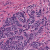

(None,
 (50, 50, 3),
 array([[[167, 119, 185],
         [160, 111, 190],
         [162, 110, 201],
         ...,
         [157, 107, 165],
         [134,  78, 127],
         [187, 153, 206]],
 
        [[160, 110, 192],
         [163, 111, 182],
         [159, 116, 178],
         ...,
         [157, 101, 177],
         [132,  80, 119],
         [159, 109, 165]],
 
        [[136,  82, 172],
         [137,  85, 165],
         [143,  91, 163],
         ...,
         [174, 124, 189],
         [170, 126, 188],
         [154, 101, 153]],
 
        ...,
 
        [[152,  88, 149],
         [130,  67, 102],
         [140,  86, 124],
         ...,
         [109,  47,  78],
         [144,  89, 127],
         [164, 103, 171]],
 
        [[154,  97, 162],
         [147,  88, 132],
         [146,  89, 133],
         ...,
         [144,  85, 131],
         [133,  70, 112],
         [140,  85, 132]],
 
        [[163, 106, 173],
         [154,  99, 168],
         [159, 105, 166],
         ...,
       

In [ ]:
cv2_imshow(cls[1]['1'][100]), cls[1]['1'][100].shape, cls[1]['1'][100]

In [ ]:
file_loc[1]['1'][100]

'/content/1_1/10273_idx5_x1851_y1351_class1.png'

## Regularization for Image Processing

A. Preparing dataset, augment the data by using translation, rotation by multiples of 90 degree and implement the following CNN for the task above.

But before any technique: Image Resizing and Normalization:

In [ ]:
IMAGE_SIZE = 50
tf.compat.v1.disable_eager_execution() # for faster working with tensorflow
tf.compat.v1.disable_v2_behavior() # compat allows you to write code that works both in TensorFlow 1. x and 2. x.

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import matplotlib.image as mpimg

IMAGE_SIZE = 50
tf.compat.v1.disable_eager_execution() # for faster working with tensorflow
tf.compat.v1.disable_v2_behavior() # compat allows you to write code that works both in TensorFlow 1. x and 2. x.

def tf_resize_images(X_img_file_paths):
    X_data = []
    tf.compat.v1.reset_default_graph()
    X = tf.compat.v1.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize(X, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())

        # Each image is resized individually as different image may be of different size.
        # file_path = X_img_file_paths
        for index, file_path in enumerate(X_img_file_paths):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    print(len(X_data))
    return X_data

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
for idx,i in enumerate(file_names):
  for j in i:
    res = tf_resize_images(file_loc[idx][j])
    cls[idx][j] = res

2993
3407
4290
4066
3338
4390
4356
3795
4047
2913
3695
3821
3640
3555
3182


In [ ]:
for idx,i in enumerate(cls):
  key = i.keys()
  for j in file_names[idx]:
    uni = []
    for k in cls[idx][j]:
      sh = k.shape
      if sh not in uni:
        uni.append(sh)
    print('unique shape in class '+str(idx)+' '+j,uni)

unique shape in class 0 b [(50, 50, 3)]
unique shape in class 0 g [(50, 50, 3)]
unique shape in class 0 f [(50, 50, 3)]
unique shape in class 0 a [(50, 50, 3)]
unique shape in class 0 c [(50, 50, 3)]
unique shape in class 0 e [(50, 50, 3)]
unique shape in class 0 h [(50, 50, 3)]
unique shape in class 0 d [(50, 50, 3)]
unique shape in class 1 6 [(50, 50, 3)]
unique shape in class 1 5 [(50, 50, 3)]
unique shape in class 1 2 [(50, 50, 3)]
unique shape in class 1 3 [(50, 50, 3)]
unique shape in class 1 1 [(50, 50, 3)]
unique shape in class 1 7 [(50, 50, 3)]
unique shape in class 1 4 [(50, 50, 3)]


In [ ]:
shp(cls)

length of class 0 b 2993
length of class 0 g 3407
length of class 0 f 4290
length of class 0 a 4066
length of class 0 c 3338
length of class 0 e 4390
length of class 0 h 4356
length of class 0 d 3795
length of class 1 6 4047
length of class 1 5 2913
length of class 1 2 3695
length of class 1 3 3821
length of class 1 1 3640
length of class 1 7 3555
length of class 1 4 3182


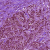

(None,
 (50, 50, 3),
 array([[[185., 119., 167.],
         [190., 111., 160.],
         [201., 110., 162.],
         ...,
         [165., 107., 157.],
         [127.,  78., 134.],
         [206., 153., 187.]],
 
        [[192., 110., 160.],
         [182., 111., 163.],
         [178., 116., 159.],
         ...,
         [177., 101., 157.],
         [119.,  80., 132.],
         [165., 109., 159.]],
 
        [[172.,  82., 136.],
         [165.,  85., 137.],
         [163.,  91., 143.],
         ...,
         [189., 124., 174.],
         [188., 126., 170.],
         [153., 101., 154.]],
 
        ...,
 
        [[149.,  88., 152.],
         [102.,  67., 130.],
         [124.,  86., 140.],
         ...,
         [ 78.,  47., 109.],
         [127.,  89., 144.],
         [171., 103., 164.]],
 
        [[162.,  97., 154.],
         [132.,  88., 147.],
         [133.,  89., 146.],
         ...,
         [131.,  85., 144.],
         [112.,  70., 133.],
         [132.,  85., 140.]],
 
        [

In [ ]:
cv2_imshow(cls[1]['1'][100]*255), cls[1]['1'][100].shape, cls[1]['1'][100]*255

In [ ]:
images = [[],[]]

for idx,i in enumerate(file_names):
  for j in i:
    for k in cls[idx][j]:
      images[idx].append(k)

In [ ]:
np.savez_compressed('images.npz', images)

In [ ]:
path = 'images.npz'

In [ ]:
dict_data = np.load(path, allow_pickle=True)
# extract the first array
images = dict_data['arr_0']

(<matplotlib.image.AxesImage at 0x7f3d98ea69b0>, (50, 50, 3))

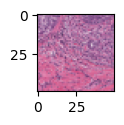

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(images[0][101]), images[0][101].shape

Rotation (at multiple of 90 degrees):

In [ ]:
def rotate_images(X_imgs):
    X_rotate = []
    original = X_imgs.copy()
    tf.compat.v1.reset_default_graph()
    X = tf.compat.v1.placeholder(tf.float32, shape = (IMAGE_SIZE, IMAGE_SIZE, 3))
    k = tf.compat.v1.placeholder(tf.int32)
    tf_img = tf.image.rot90(X, k = k)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        for img in X_imgs:
            rd = random.randint(0,3)  # Rotation at 0, 90, 180 and 270 degrees
            rotated_img = sess.run(tf_img, feed_dict = {X: img, k: rd + 1})
            X_rotate.append(rotated_img)

    X_rotate = np.array(X_rotate, dtype = np.float32)
    X_rotate = np.vstack([X_rotate,original])
    print(len(X_rotate))
    return X_rotate

In [ ]:
data = [[],[]]
for idx,i in enumerate(images):
    tr = rotate_images(i)
    data[idx] = tr

2023-06-30 18:50:13.594379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-30 18:50:13.596056: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-30 18:50:13.600640: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


61270
49706


In [ ]:
(data[0].shape, data[1].shape)

((61270, 50, 50, 3), (49706, 50, 50, 3))

Translation:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


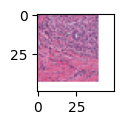

In [ ]:
def image_translate(img):
    height, width = img.shape[:2]
    a, b = random.uniform(-1,1), random.uniform(-1,1)
    quarter_height, quarter_width = a*height//4, b*width//4
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    # We use warpAffine to transform
    # the image using the matrix, T
    img_translation = cv2.warpAffine(img, T, (width, height))
    # Find the pixels with value 0 in all channels

    zero_pixels = np.where(img_translation == 0)
    # Replace the zero pixels with 255 in all channels
    img_translation[zero_pixels] = 255
    return img_translation

plt.figure(figsize=(1,1))
plt.imshow(image_translate(images[0][101]))

In [ ]:
data2 = [[],[]]
for idx, imgs in enumerate(data):
    for img in imgs:
        # data2[idx].extend([img, image_translate(img)])
        rdx = random.randint(0,1)
        if rdx:
            data2[idx].append(image_translate(img))
        else:
            data2[idx].append(img)
    data2[idx] = np.array(data2[idx])
    print(len(data2[idx]))

61270
49706


In [ ]:
a, b = random.uniform(-1,1), random.uniform(-1,1)
quarter_height, quarter_width = a*50//4, b*50//4
quarter_height, quarter_width

(-1.0, -8.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


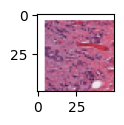

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(image_translate(data2[1][2340]))

In [ ]:
images = np.vstack([data2[0],data2[1]])

In [ ]:
images.shape

(110976, 50, 50, 3)

In [ ]:
n = np.zeros(len(data2[0]))
p = np.ones(len(data2[1]))

y = list(n)+list(p)
y = np.array(y)

In [ ]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
np.savez_compressed('Preprocessed_images2.npz', images)

In [ ]:
np.savez_compressed('Preprocessed_y2.npz', y)

## Loading preprocessed data

In [4]:
dict_data = np.load('/content/drive/MyDrive/Colab Notebooks/data/Preprocessed_images2.npz', allow_pickle=True)
# extract the first array
images = dict_data['arr_0']

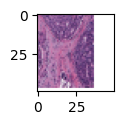

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(images[45645])

In [6]:
dict_data = np.load('/content/drive/MyDrive/Colab Notebooks/data/Preprocessed_y2.npz', allow_pickle=True)
# extract the first array
y = dict_data['arr_0']

In [7]:
len(images), len(y), y

(110976, 110976, array([0., 0., 0., ..., 1., 1., 1.]))

In [ ]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, 2)

In [8]:
images, images_test, y, y_test = train_test_split(images, y, test_size=0.20, random_state=42)

In [9]:
len(images)

88780

In [10]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history

## Models 1

Optimizer - SGD
activation function - relu
convolution layers - 2
deep net layers - 2

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train, lr=0.005, ep=10):
  learning_rate = lr
  epp = ep
  batch_s = 512

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])

  # Compile the Model

  model.compile(optimizer=SGD(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train,
                      epochs=epp,
                      validation_split=0.2,
                      batch_size=batch_s,
                      verbose=1
                      # callbacks=[callback]
                      )

  return model,history

Epoch 1/10
465/465 [==============================] - 86s 175ms/step - loss: 0.7562 - accuracy: 0.5523 - val_loss: 0.6860 - val_accuracy: 0.5531
Epoch 2/10
465/465 [==============================] - 77s 163ms/step - loss: 0.6840 - accuracy: 0.5530 - val_loss: 0.6789 - val_accuracy: 0.5531
Epoch 3/10
465/465 [==============================] - 76s 164ms/step - loss: 0.6743 - accuracy: 0.5724 - val_loss: 0.6664 - val_accuracy: 0.6210
Epoch 4/10
465/465 [==============================] - 78s 167ms/step - loss: 0.6612 - accuracy: 0.6189 - val_loss: 0.6483 - val_accuracy: 0.6398
Epoch 5/10
465/465 [==============================] - 78s 167ms/step - loss: 0.6405 - accuracy: 0.6408 - val_loss: 0.6242 - val_accuracy: 0.6551
Epoch 6/10
465/465 [==============================] - 78s 167ms/step - loss: 0.6502 - accuracy: 0.6387 - val_loss: 0.6460 - val_accuracy: 0.6201
Epoch 7/10
465/465 [==============================] - 76s 164ms/step - loss: 0.6268 - accuracy: 0.6482 - val_loss: 0.6102 - val_ac

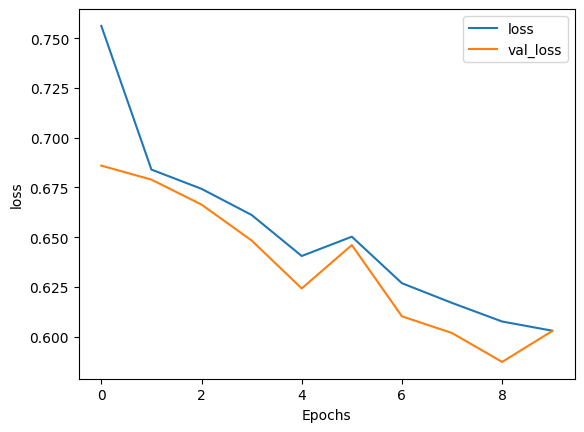

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.005)
plot_history(history_seq, 'loss')

Epoch 1/10


2023-06-30 14:55:24.430202: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4261440000 exceeds 10% of free system memory.


278/278 [==============================] - ETA: 0s - loss: 0.7770 - accuracy: 0.5494

2023-06-30 14:56:54.565503: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1065390000 exceeds 10% of free system memory.


278/278 [==============================] - 96s 343ms/step - loss: 0.7770 - accuracy: 0.5494 - val_loss: 0.6885 - val_accuracy: 0.5540
Epoch 2/10
278/278 [==============================] - 92s 328ms/step - loss: 0.6880 - accuracy: 0.5515 - val_loss: 0.6867 - val_accuracy: 0.5540
Epoch 3/10
278/278 [==============================] - 90s 323ms/step - loss: 0.6864 - accuracy: 0.5520 - val_loss: 0.6848 - val_accuracy: 0.5540
Epoch 4/10
278/278 [==============================] - 90s 323ms/step - loss: 0.6846 - accuracy: 0.5524 - val_loss: 0.6835 - val_accuracy: 0.5540
Epoch 5/10
278/278 [==============================] - 90s 322ms/step - loss: 0.6831 - accuracy: 0.5524 - val_loss: 0.6818 - val_accuracy: 0.5540
Epoch 6/10
278/278 [==============================] - 89s 321ms/step - loss: 0.6813 - accuracy: 0.5524 - val_loss: 0.6792 - val_accuracy: 0.5540
Epoch 7/10
278/278 [==============================] - 91s 328ms/step - loss: 0.6791 - accuracy: 0.5524 - val_loss: 0.6766 - val_accuracy: 0.5

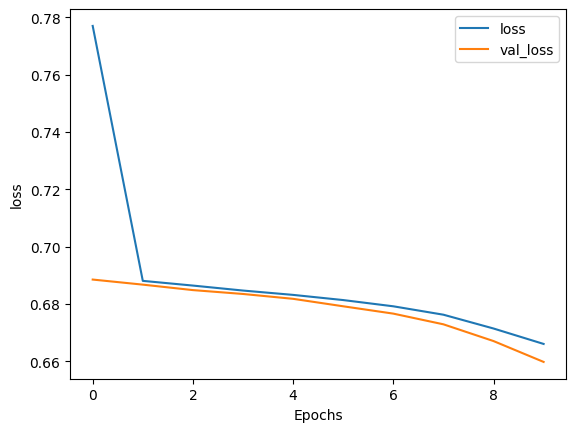

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.005, 25)
plot_history(history_seq, 'loss')

2023-06-30 15:11:40.961019: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4261440000 exceeds 10% of free system memory.


Epoch 1/50
278/278 [==============================] - ETA: 0s - loss: 0.8685 - accuracy: 0.5505

2023-06-30 15:16:00.507145: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1065390000 exceeds 10% of free system memory.


278/278 [==============================] - 173s 594ms/step - loss: 0.8685 - accuracy: 0.5505 - val_loss: 0.6890 - val_accuracy: 0.5540
Epoch 2/50
278/278 [==============================] - 94s 328ms/step - loss: 0.6884 - accuracy: 0.5524 - val_loss: 0.6878 - val_accuracy: 0.5540
Epoch 3/50
278/278 [==============================] - 89s 320ms/step - loss: 0.6877 - accuracy: 0.5524 - val_loss: 0.6871 - val_accuracy: 0.5540
Epoch 4/50
278/278 [==============================] - 89s 319ms/step - loss: 0.6871 - accuracy: 0.5524 - val_loss: 0.6864 - val_accuracy: 0.5540
Epoch 5/50
278/278 [==============================] - 89s 319ms/step - loss: 0.6864 - accuracy: 0.5524 - val_loss: 0.6855 - val_accuracy: 0.5540
Epoch 6/50
278/278 [==============================] - 88s 316ms/step - loss: 0.6856 - accuracy: 0.5524 - val_loss: 0.6846 - val_accuracy: 0.5540
Epoch 7/50
278/278 [==============================] - 88s 316ms/step - loss: 0.6848 - accuracy: 0.5524 - val_loss: 0.6839 - val_accuracy: 0.

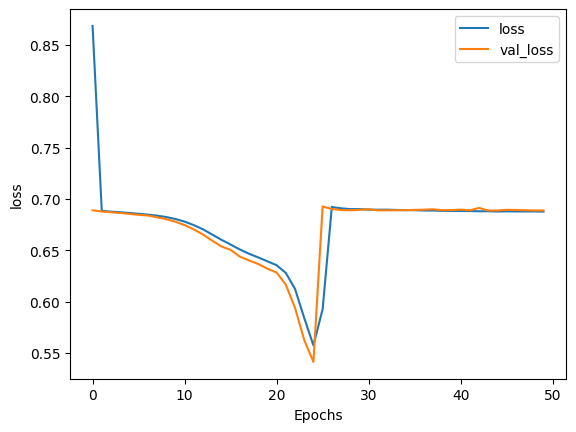

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.005, 50)
plot_history(history_seq, 'loss')

In [ ]:
model_seq.save('model1_h5')
# x = keras.models.load_model("Flight.h5")

2023-06-30 16:29:09.167524: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,16]
	 [[{{node inputs}}]]
2023-06-30 16:29:09.178047: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,16]
	 [[{{node inputs}}]]
2023-06-30 16:29:09.358140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,16]
	 [[{{node inputs}}]]
2023-06-30 16:29:09

INFO:tensorflow:Assets written to: model1_h5/assets


INFO:tensorflow:Assets written to: model1_h5/assets


Epoch 1/10


2023-06-30 14:16:28.626326: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4261440000 exceeds 10% of free system memory.


278/278 [==============================] - ETA: 0s - loss: 1.1398 - accuracy: 0.5519

2023-06-30 14:17:57.812110: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1065390000 exceeds 10% of free system memory.


278/278 [==============================] - 92s 328ms/step - loss: 1.1398 - accuracy: 0.5519 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 2/10
278/278 [==============================] - 89s 314ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 3/10
278/278 [==============================] - 86s 308ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6872 - val_accuracy: 0.5540
Epoch 4/10
278/278 [==============================] - 85s 307ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 5/10
278/278 [==============================] - 84s 303ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6872 - val_accuracy: 0.5540
Epoch 6/10
278/278 [==============================] - 85s 304ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6872 - val_accuracy: 0.5540
Epoch 7/10
278/278 [==============================] - 84s 304ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5

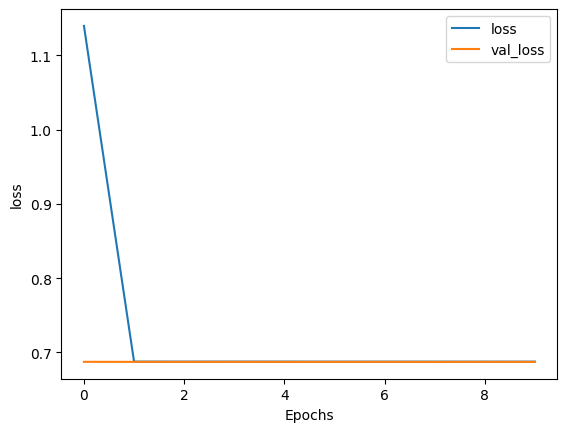

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.01)
plot_history(history_seq, 'loss')

2023-06-30 16:29:09.747072: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4261440000 exceeds 10% of free system memory.


Epoch 1/50
278/278 [==============================] - 114s 408ms/step - loss: 0.8350 - accuracy: 0.5494 - val_loss: 0.6874 - val_accuracy: 0.5540
Epoch 2/50
278/278 [==============================] - 93s 326ms/step - loss: 0.6873 - accuracy: 0.5524 - val_loss: 0.6867 - val_accuracy: 0.5540
Epoch 3/50
278/278 [==============================] - 90s 323ms/step - loss: 0.6867 - accuracy: 0.5524 - val_loss: 0.6860 - val_accuracy: 0.5540
Epoch 4/50
278/278 [==============================] - 88s 318ms/step - loss: 0.6860 - accuracy: 0.5524 - val_loss: 0.6852 - val_accuracy: 0.5540
Epoch 5/50
278/278 [==============================] - 89s 322ms/step - loss: 0.6851 - accuracy: 0.5524 - val_loss: 0.6838 - val_accuracy: 0.5540
Epoch 6/50
278/278 [==============================] - 92s 331ms/step - loss: 0.6833 - accuracy: 0.5524 - val_loss: 0.6813 - val_accuracy: 0.5540
Epoch 7/50
278/278 [==============================] - 90s 325ms/step - loss: 0.6805 - accuracy: 0.5524 - val_loss: 0.6772 - val_a

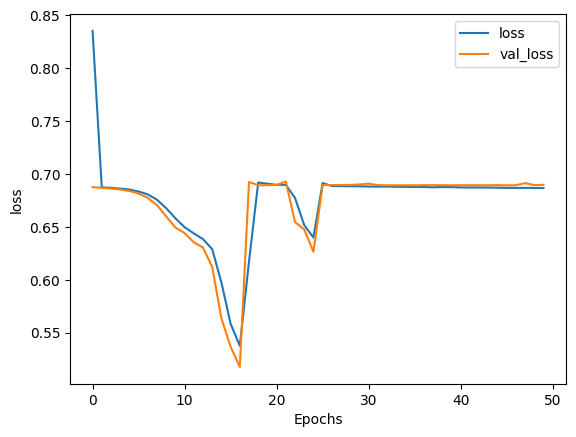

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.01, 50)
plot_history(history_seq, 'loss')

2023-06-30 14:30:54.652403: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 4261440000 exceeds 10% of free system memory.


Epoch 1/10
278/278 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.5511

2023-06-30 14:34:03.142679: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1065390000 exceeds 10% of free system memory.


278/278 [==============================] - 150s 518ms/step - loss: 0.7548 - accuracy: 0.5511 - val_loss: 0.6842 - val_accuracy: 0.5541
Epoch 2/10
278/278 [==============================] - 91s 320ms/step - loss: 0.6728 - accuracy: 0.5524 - val_loss: 0.6788 - val_accuracy: 0.5541
Epoch 3/10
278/278 [==============================] - 85s 304ms/step - loss: 0.6881 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5541
Epoch 4/10
278/278 [==============================] - 84s 300ms/step - loss: 0.6877 - accuracy: 0.5524 - val_loss: 0.6871 - val_accuracy: 0.5541
Epoch 5/10
278/278 [==============================] - 84s 302ms/step - loss: 0.6883 - accuracy: 0.5524 - val_loss: 0.6872 - val_accuracy: 0.5541
Epoch 6/10
278/278 [==============================] - 84s 302ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6871 - val_accuracy: 0.5541
Epoch 7/10
278/278 [==============================] - 84s 303ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6871 - val_accuracy: 0.

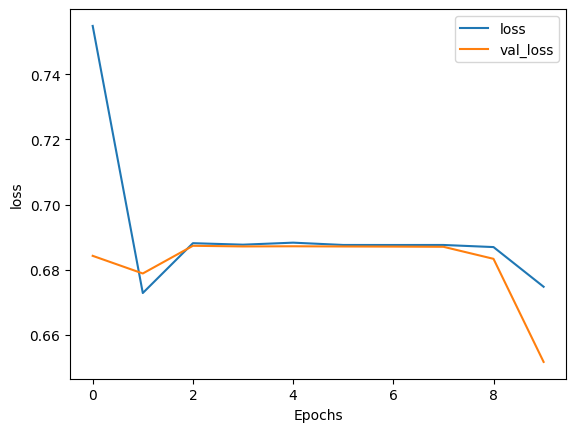

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.02)
plot_history(history_seq, 'loss')

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, 0.02, 50)
plot_history(history_seq, 'loss')

Epoch 1/50
278/278 [==============================] - 182s 615ms/step - loss: 1807.2249 - accuracy: 0.5512 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 2/50
278/278 [==============================] - 93s 324ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 3/50
278/278 [==============================] - 88s 315ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 4/50
278/278 [==============================] - 88s 316ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 5/50
278/278 [==============================] - 87s 313ms/step - loss: 0.6877 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 6/50
278/278 [==============================] - 87s 315ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - val_accuracy: 0.5540
Epoch 7/50
278/278 [==============================] - 88s 315ms/step - loss: 0.6876 - accuracy: 0.5524 - val_loss: 0.6873 - va

KeyboardInterrupt: 

## Prediction Function

In [11]:
def accuracy(model_seq):
  pred = np.round(model_seq.predict(images_test))
  y_hat = []
  for i in pred:
    if i[0] == 1:
      y_hat.append(0)
    else:
      y_hat.append(1)

  df = pd.DataFrame()
  df['Actual'] = y_test
  df['Pred'] =  y_hat
  print(df)

  cnt = 0
  for idx in range(len(df)):
    row = df.iloc[idx]
    if row["Actual"]==row["Pred"]:
      cnt += 1
  return cnt/len(df), y_hat

In [12]:
def auc_roc(model):
  acc, pred = accuracy(model)
  train_categories = ["Negative", "Positive"]

  labels = np.arange(2)

  clf_report = classification_report(y_test,
                                     pred,
                                     labels=labels,
                                     target_names=train_categories,
                                     output_dict=True)

  # .iloc[:-1, :] to exclude support
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

  y_score = model.predict(images_test)

  again_test_label = []
  for i in range(len(images_test)):
    arr = np.zeros(2)
    arr[int(y_test[i])] = 1
    again_test_label.append(list(arr))

  again_test_label = np.array(again_test_label)

  # plotting a line plot after changing it's width and height
  f = plt.figure()

  f.set_figwidth(10)
  f.set_figheight(10)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  lw=2

  for i in range(2):
      fpr[i], tpr[i], _ = roc_curve(again_test_label[:,i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  colors = cycle(['b', 'r'])
  plt.figure(figsize=(5,5))
  for i, color in zip(range(2), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
               ''.format(train_categories[i], roc_auc[i]))


  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc="lower right")
  plt.show()

## Models 2

optimizer - Adam
acitivation function - relu

In [13]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [14]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train, lr=0.01, ep=10):
  learning_rate = lr
  epp = ep
  batch_s = 512

  model = keras.Sequential([
    layers.Conv2D(128, (3,3), padding='valid', activation='relu', input_shape=(50,50,3)),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])

  # Compile the Model

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train,
                      epochs=epp,
                      validation_split=0.2,
                      batch_size=batch_s,
                      verbose=1,
                      callbacks=[callback]
                      )

  return model,history

Epoch 1/10
70/70 [==============================] - 7s 75ms/step - loss: 0.6871 - accuracy: 0.5538 - val_loss: 0.6692 - val_accuracy: 0.5966
Epoch 2/10
70/70 [==============================] - 4s 64ms/step - loss: 0.6409 - accuracy: 0.6211 - val_loss: 0.6559 - val_accuracy: 0.6167
Epoch 3/10
70/70 [==============================] - 4s 62ms/step - loss: 0.6219 - accuracy: 0.6474 - val_loss: 0.6047 - val_accuracy: 0.6646
Epoch 4/10
70/70 [==============================] - 5s 66ms/step - loss: 0.5972 - accuracy: 0.6672 - val_loss: 0.5923 - val_accuracy: 0.6886
Epoch 5/10
70/70 [==============================] - 5s 67ms/step - loss: 0.5671 - accuracy: 0.7060 - val_loss: 0.5531 - val_accuracy: 0.7232
Epoch 6/10
70/70 [==============================] - 4s 63ms/step - loss: 0.5361 - accuracy: 0.7354 - val_loss: 0.5912 - val_accuracy: 0.7062
Epoch 7/10
70/70 [==============================] - 5s 66ms/step - loss: 0.5056 - accuracy: 0.7623 - val_loss: 0.5097 - val_accuracy: 0.7544
Epoch 8/10
70

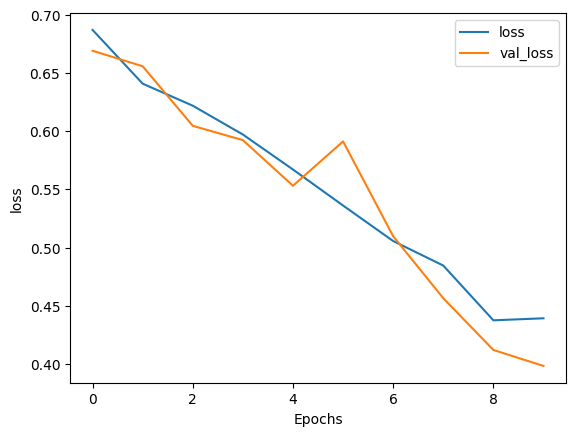

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y)
plot_history(history_seq, 'loss')

Epoch 1/25
70/70 [==============================] - 7s 78ms/step - loss: 0.6691 - accuracy: 0.5740 - val_loss: 0.6531 - val_accuracy: 0.6144
Epoch 2/25
70/70 [==============================] - 4s 62ms/step - loss: 0.6217 - accuracy: 0.6354 - val_loss: 0.6174 - val_accuracy: 0.6410
Epoch 3/25
70/70 [==============================] - 4s 61ms/step - loss: 0.6119 - accuracy: 0.6459 - val_loss: 0.6179 - val_accuracy: 0.6365
Epoch 4/25
70/70 [==============================] - 4s 63ms/step - loss: 0.5964 - accuracy: 0.6606 - val_loss: 0.5821 - val_accuracy: 0.6774
Epoch 5/25
70/70 [==============================] - 4s 62ms/step - loss: 0.5622 - accuracy: 0.6966 - val_loss: 0.5354 - val_accuracy: 0.7216
Epoch 6/25
70/70 [==============================] - 4s 61ms/step - loss: 0.5226 - accuracy: 0.7295 - val_loss: 0.5127 - val_accuracy: 0.7390
Epoch 7/25
70/70 [==============================] - 5s 67ms/step - loss: 0.5190 - accuracy: 0.7312 - val_loss: 0.5587 - val_accuracy: 0.7104
Epoch 8/25
70

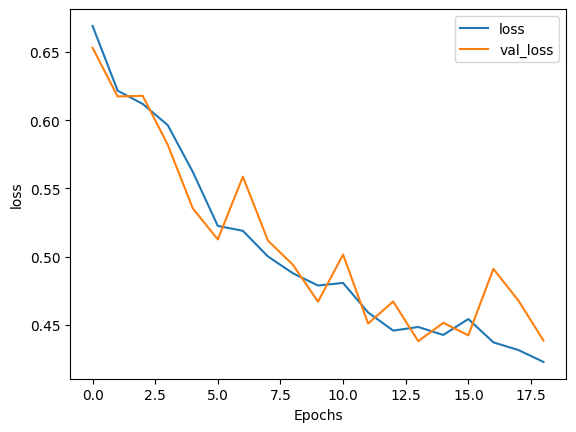

In [ ]:
# build the model

model_seq,history_seq = build_model_using_sequential(images, y, ep=25)
plot_history(history_seq, 'loss')

In [ ]:
test_loss, test_acc = model_seq.evaluate(images_test, y_test)
print('Test accuracy:', test_acc)

347/347 [==============================] - 1s 4ms/step - loss: 0.4373 - accuracy: 0.7773
Test accuracy: 0.7773472666740417


Epoch 1/25
70/70 [==============================] - 8s 74ms/step - loss: 0.6857 - accuracy: 0.5515 - val_loss: 0.6645 - val_accuracy: 0.5881
Epoch 2/25
70/70 [==============================] - 5s 66ms/step - loss: 0.6453 - accuracy: 0.6176 - val_loss: 0.6296 - val_accuracy: 0.6379
Epoch 3/25
70/70 [==============================] - 5s 66ms/step - loss: 0.6187 - accuracy: 0.6468 - val_loss: 0.6143 - val_accuracy: 0.6425
Epoch 4/25
70/70 [==============================] - 5s 64ms/step - loss: 0.5989 - accuracy: 0.6612 - val_loss: 0.5869 - val_accuracy: 0.6792
Epoch 5/25
70/70 [==============================] - 4s 61ms/step - loss: 0.5752 - accuracy: 0.6829 - val_loss: 0.5631 - val_accuracy: 0.6985
Epoch 6/25
70/70 [==============================] - 4s 64ms/step - loss: 0.5414 - accuracy: 0.7133 - val_loss: 0.5363 - val_accuracy: 0.7214
Epoch 7/25
70/70 [==============================] - 5s 69ms/step - loss: 0.5164 - accuracy: 0.7333 - val_loss: 0.5085 - val_accuracy: 0.7440
Epoch 8/25
70

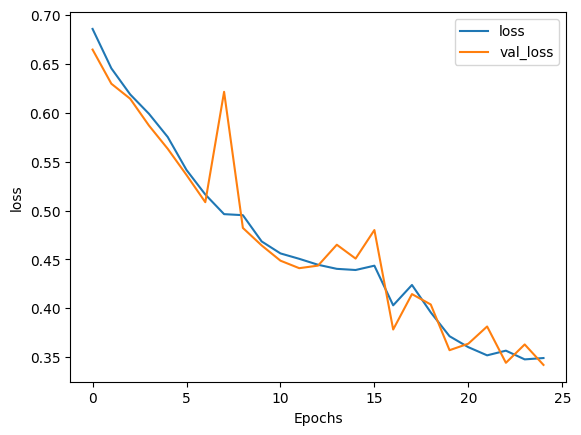

In [ ]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.2, ep=25)
plot_history(history_seq, 'loss')

In [ ]:
accuracy(model_seq)

347/347 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     0
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     1

[11098 rows x 2 columns]


0.8479906289421517

Epoch 1/25
70/70 [==============================] - 7s 75ms/step - loss: 0.6847 - accuracy: 0.5549 - val_loss: 0.6746 - val_accuracy: 0.5698
Epoch 2/25
70/70 [==============================] - 5s 68ms/step - loss: 0.6460 - accuracy: 0.6104 - val_loss: 0.6440 - val_accuracy: 0.6257
Epoch 3/25
70/70 [==============================] - 5s 65ms/step - loss: 0.6211 - accuracy: 0.6304 - val_loss: 0.6148 - val_accuracy: 0.6460
Epoch 4/25
70/70 [==============================] - 5s 66ms/step - loss: 0.6036 - accuracy: 0.6476 - val_loss: 0.6007 - val_accuracy: 0.6450
Epoch 5/25
70/70 [==============================] - 5s 68ms/step - loss: 0.5790 - accuracy: 0.6672 - val_loss: 0.6192 - val_accuracy: 0.6478
Epoch 6/25
70/70 [==============================] - 4s 62ms/step - loss: 0.5647 - accuracy: 0.6873 - val_loss: 0.5521 - val_accuracy: 0.6856
Epoch 7/25
70/70 [==============================] - 4s 63ms/step - loss: 0.5376 - accuracy: 0.7090 - val_loss: 0.5597 - val_accuracy: 0.6949
Epoch 8/25
70

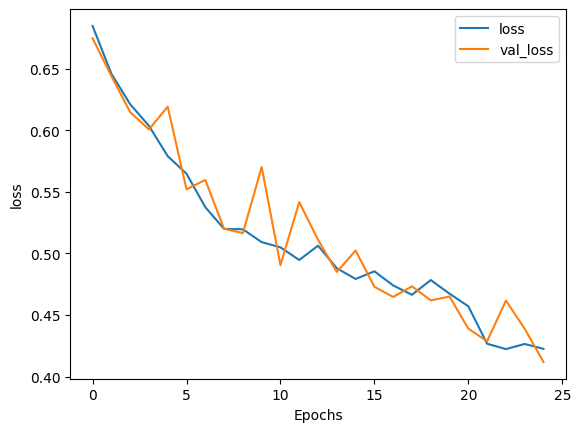

In [ ]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.25, ep=25)
plot_history(history_seq, 'loss')

In [ ]:
accuracy(model_seq)

347/347 [==============================] - 1s 3ms/step
       Actual  Pred
0         1.0     0
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     0
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     0

[11098 rows x 2 columns]


0.7848260947918544

347/347 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     0
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     0
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     0

[11098 rows x 2 columns]
347/347 [==============================] - 1s 2ms/step


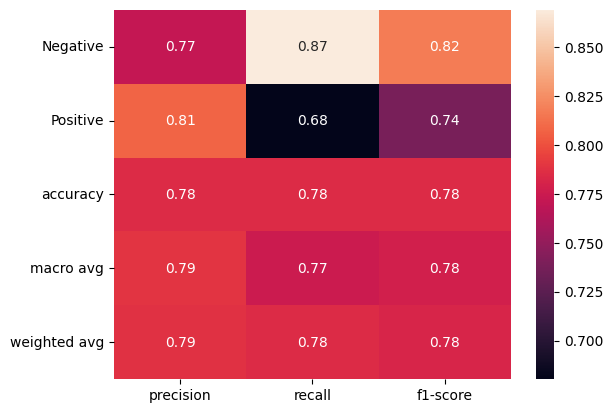

<Figure size 1000x1000 with 0 Axes>

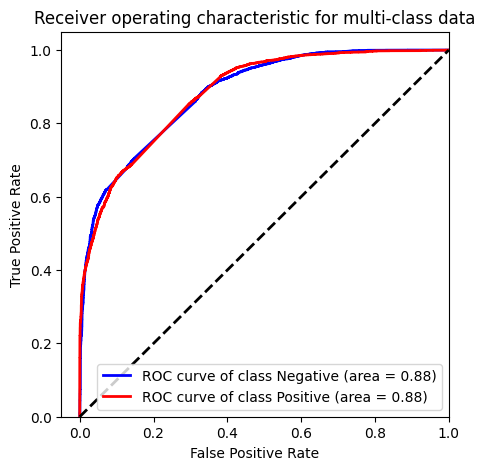

In [ ]:
auc_roc(model_seq)

In [ ]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.05, ep=100)
plot_history(history_seq, 'loss')

In [ ]:
accuracy(model_seq)[0]

347/347 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     0
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     0
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     0

[11098 rows x 2 columns]


0.7602270679401694

347/347 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     0
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     0
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     0

[11098 rows x 2 columns]
347/347 [==============================] - 1s 2ms/step


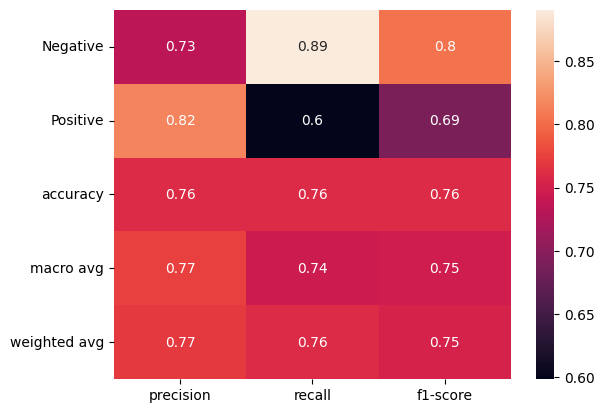

<Figure size 1000x1000 with 0 Axes>

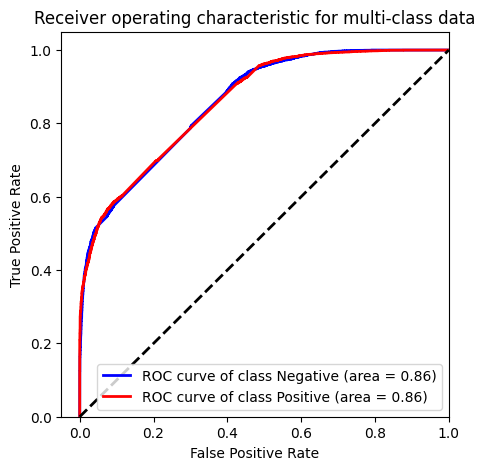

In [ ]:
auc_roc(model_seq)

In [ ]:
model_seq.save('X2.h5')

Epoch 1/100
70/70 [==============================] - 9s 82ms/step - loss: 0.7072 - accuracy: 0.5340 - val_loss: 0.6850 - val_accuracy: 0.5340
Epoch 2/100
70/70 [==============================] - 5s 68ms/step - loss: 0.6795 - accuracy: 0.5634 - val_loss: 0.6641 - val_accuracy: 0.5935
Epoch 3/100
70/70 [==============================] - 5s 65ms/step - loss: 0.6461 - accuracy: 0.6224 - val_loss: 0.6398 - val_accuracy: 0.6273
Epoch 4/100
70/70 [==============================] - 4s 61ms/step - loss: 0.6306 - accuracy: 0.6304 - val_loss: 0.6215 - val_accuracy: 0.6445
Epoch 5/100
70/70 [==============================] - 5s 68ms/step - loss: 0.6146 - accuracy: 0.6472 - val_loss: 0.6282 - val_accuracy: 0.6309
Epoch 6/100
70/70 [==============================] - 5s 70ms/step - loss: 0.6099 - accuracy: 0.6441 - val_loss: 0.6012 - val_accuracy: 0.6542
Epoch 7/100
70/70 [==============================] - 5s 74ms/step - loss: 0.5930 - accuracy: 0.6604 - val_loss: 0.5982 - val_accuracy: 0.6569
Epoch 

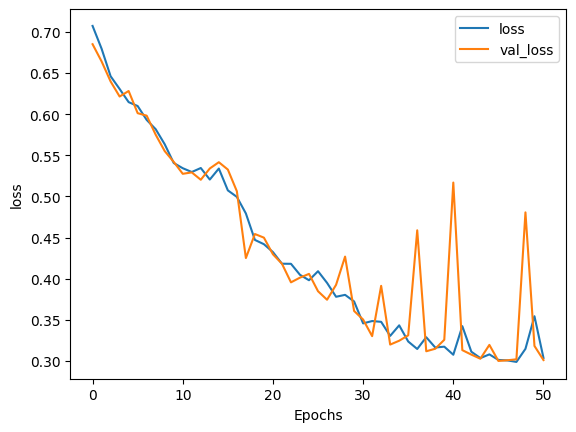

In [ ]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.1, ep=100)
plot_history(history_seq, 'loss')

In [ ]:
accuracy(model_seq)[0]

347/347 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     1
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     1

[11098 rows x 2 columns]


0.8652009371057848

347/347 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     1
1         0.0     0
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
11093     0.0     0
11094     0.0     0
11095     0.0     0
11096     1.0     0
11097     1.0     1

[11098 rows x 2 columns]
347/347 [==============================] - 1s 3ms/step


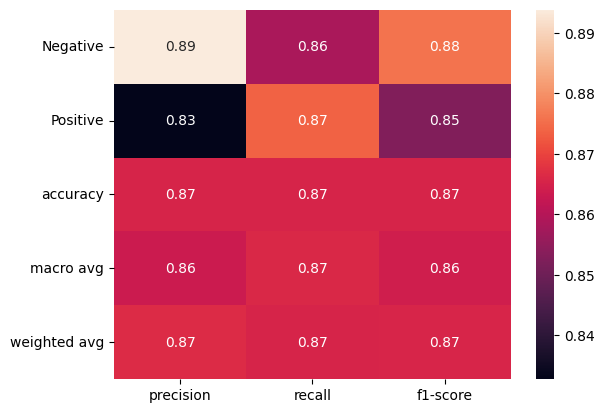

<Figure size 1000x1000 with 0 Axes>

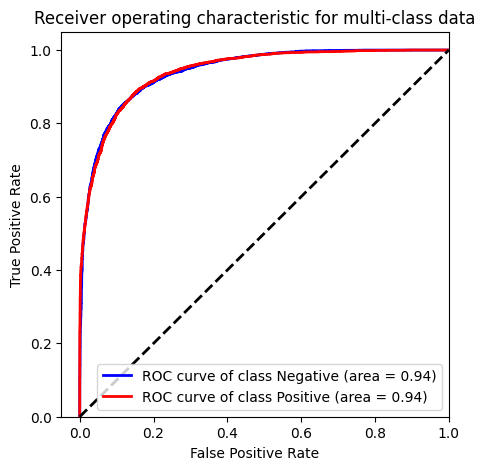

In [ ]:
auc_roc(model_seq)

In [ ]:
model_seq.save('X1.h5')

Epoch 1/100
139/139 [==============================] - 24s 77ms/step - loss: 0.6688 - accuracy: 0.5814 - val_loss: 0.6326 - val_accuracy: 0.6425
Epoch 2/100
139/139 [==============================] - 9s 62ms/step - loss: 0.6154 - accuracy: 0.6471 - val_loss: 0.5987 - val_accuracy: 0.6608
Epoch 3/100
139/139 [==============================] - 9s 62ms/step - loss: 0.5901 - accuracy: 0.6652 - val_loss: 0.5744 - val_accuracy: 0.6855
Epoch 4/100
139/139 [==============================] - 8s 58ms/step - loss: 0.5669 - accuracy: 0.6812 - val_loss: 0.5761 - val_accuracy: 0.6743
Epoch 5/100
139/139 [==============================] - 8s 58ms/step - loss: 0.5531 - accuracy: 0.6958 - val_loss: 0.5468 - val_accuracy: 0.7049
Epoch 6/100
139/139 [==============================] - 8s 59ms/step - loss: 0.5300 - accuracy: 0.7148 - val_loss: 0.5166 - val_accuracy: 0.7242
Epoch 7/100
139/139 [==============================] - 8s 58ms/step - loss: 0.5015 - accuracy: 0.7341 - val_loss: 0.4879 - val_accuracy

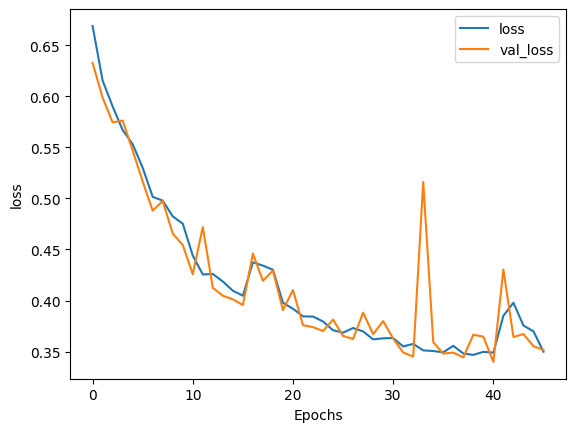

In [15]:
# for 800 mb data
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.1, ep=100)
plot_history(history_seq, 'loss')

694/694 [==============================] - 3s 4ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]
694/694 [==============================] - 2s 2ms/step


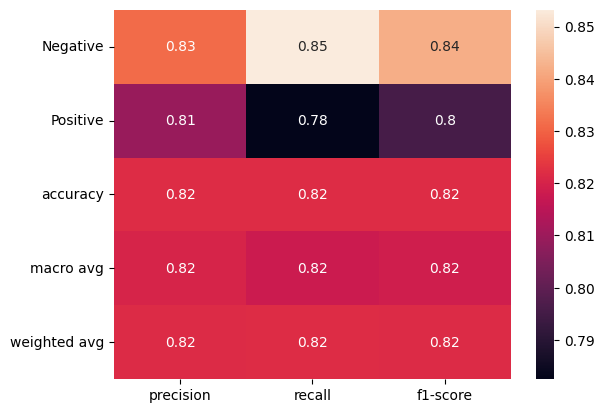

<Figure size 1000x1000 with 0 Axes>

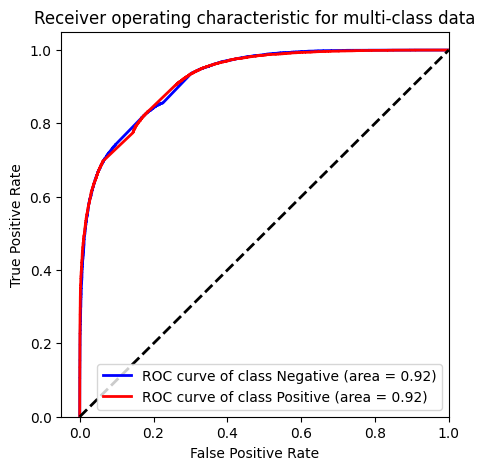

In [16]:
auc_roc(model_seq)

## Model 3

Optimizer - Adamax

In [ ]:
adamax = tf.keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adamax')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train, lr=0.01, ep=10):
  learning_rate = lr
  epp = ep
  batch_s = 512

  model = keras.Sequential([
    layers.Conv2D(128, (3,3), padding='valid', activation='relu', input_shape=(50,50,3)),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])

  # Compile the Model

  model.compile(optimizer=adamax,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train,
                      epochs=epp,
                      validation_split=0.2,
                      batch_size=batch_s,
                      verbose=1,
                      callbacks=[callback]
                      )

  return model,history

Epoch 1/100
139/139 [==============================] - 25s 89ms/step - loss: 0.6795 - accuracy: 0.5650 - val_loss: 0.6538 - val_accuracy: 0.6193
Epoch 2/100
139/139 [==============================] - 8s 59ms/step - loss: 0.6394 - accuracy: 0.6221 - val_loss: 0.6313 - val_accuracy: 0.6361
Epoch 3/100
139/139 [==============================] - 9s 61ms/step - loss: 0.6246 - accuracy: 0.6347 - val_loss: 0.6228 - val_accuracy: 0.6344
Epoch 4/100
139/139 [==============================] - 8s 58ms/step - loss: 0.6112 - accuracy: 0.6460 - val_loss: 0.6033 - val_accuracy: 0.6526
Epoch 5/100
139/139 [==============================] - 8s 59ms/step - loss: 0.5985 - accuracy: 0.6551 - val_loss: 0.5932 - val_accuracy: 0.6583
Epoch 6/100
139/139 [==============================] - 8s 57ms/step - loss: 0.5915 - accuracy: 0.6590 - val_loss: 0.5806 - val_accuracy: 0.6697
Epoch 7/100
139/139 [==============================] - 9s 64ms/step - loss: 0.5768 - accuracy: 0.6700 - val_loss: 0.5699 - val_accuracy

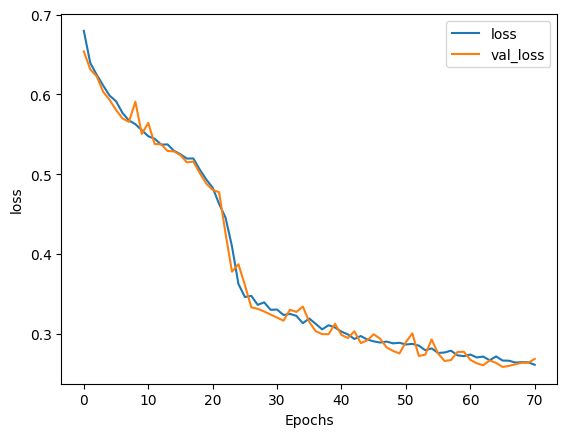

In [ ]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.1, ep=100)
plot_history(history_seq, 'loss')

In [ ]:
accuracy(model_seq)[0]

694/694 [==============================] - 2s 2ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]


0.8806992250856011

694/694 [==============================] - 1s 2ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]
694/694 [==============================] - 2s 3ms/step


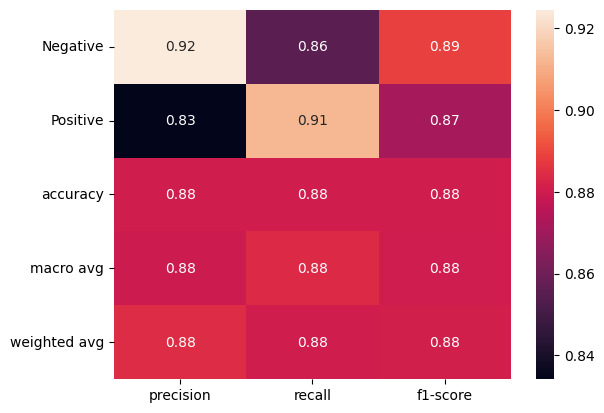

<Figure size 1000x1000 with 0 Axes>

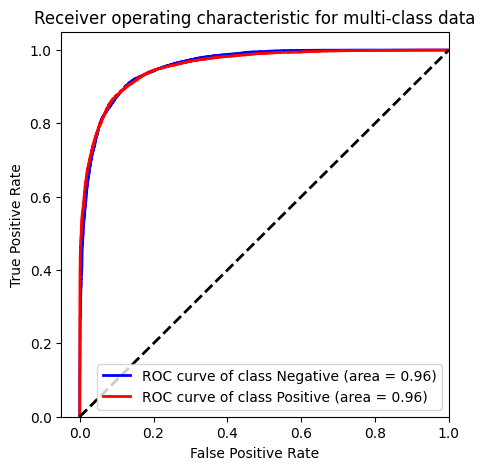

In [ ]:
auc_roc(model_seq)

In [ ]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 16)        18448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [ ]:
model_seq.save('X2.h5')

Best Model till now

## Model 4

increasing deep net layers

In [15]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [16]:
adamax = tf.keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adamax')

In [17]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train, lr=0.01, ep=10):
  learning_rate = lr
  epp = ep
  batch_s = 512

  model = keras.Sequential([
    layers.Conv2D(128, (3,3), padding='valid', activation='relu', input_shape=(50,50,3)),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])

  # Compile the Model

  model.compile(optimizer=adamax,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train,
                      epochs=epp,
                      validation_split=0.2,
                      batch_size=batch_s,
                      verbose=1,
                      callbacks=[callback]
                      )

  return model,history

Epoch 1/100
139/139 [==============================] - 23s 74ms/step - loss: 0.6865 - accuracy: 0.5464 - val_loss: 0.6826 - val_accuracy: 0.5559
Epoch 2/100
139/139 [==============================] - 9s 63ms/step - loss: 0.6742 - accuracy: 0.5929 - val_loss: 0.6609 - val_accuracy: 0.6214
Epoch 3/100
139/139 [==============================] - 9s 65ms/step - loss: 0.6489 - accuracy: 0.6299 - val_loss: 0.6393 - val_accuracy: 0.6374
Epoch 4/100
139/139 [==============================] - 8s 59ms/step - loss: 0.6332 - accuracy: 0.6401 - val_loss: 0.6273 - val_accuracy: 0.6466
Epoch 5/100
139/139 [==============================] - 9s 62ms/step - loss: 0.6199 - accuracy: 0.6491 - val_loss: 0.6158 - val_accuracy: 0.6506
Epoch 6/100
139/139 [==============================] - 9s 67ms/step - loss: 0.6090 - accuracy: 0.6517 - val_loss: 0.6040 - val_accuracy: 0.6562
Epoch 7/100
139/139 [==============================] - 9s 63ms/step - loss: 0.5976 - accuracy: 0.6602 - val_loss: 0.5924 - val_accuracy

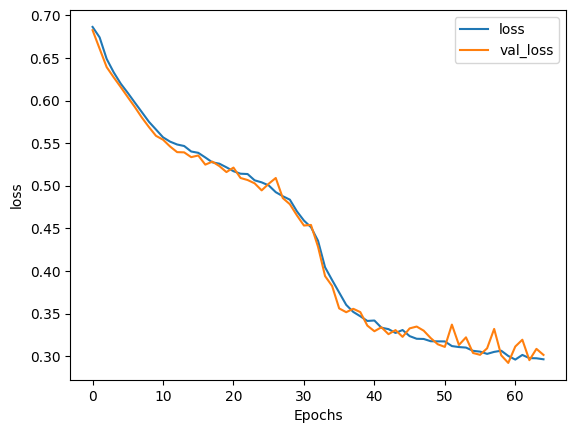

In [18]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.1, ep=100)
plot_history(history_seq, 'loss')

In [19]:
accuracy(model_seq)[0]

694/694 [==============================] - 2s 2ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]


0.8703369976572355

694/694 [==============================] - 2s 2ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]
694/694 [==============================] - 1s 2ms/step


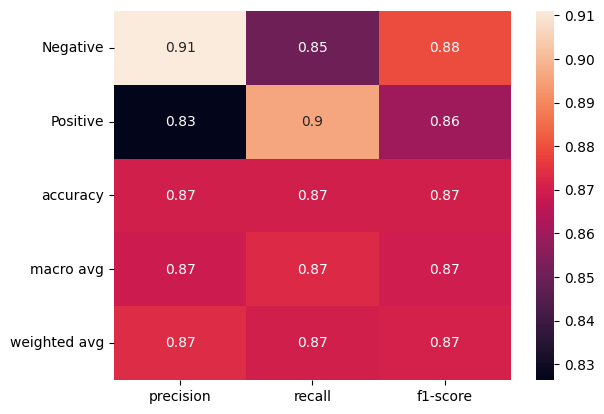

<Figure size 1000x1000 with 0 Axes>

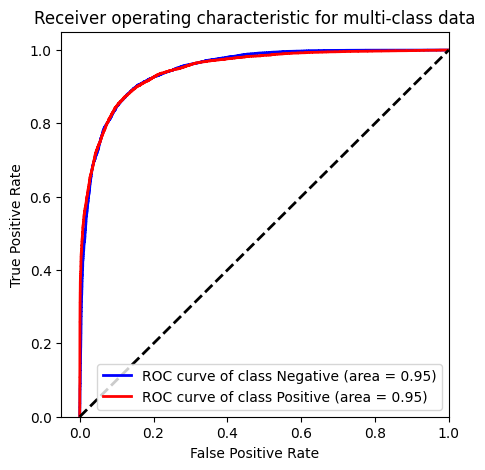

In [20]:
auc_roc(model_seq)

In [21]:
model_seq.save('X3.h5')

## Model 5

increasing deep net layers

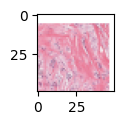

In [36]:
plt.figure(figsize=(1,1))
plt.imshow(images_test[4564])

In [15]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [16]:
adamax = tf.keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adamax')

In [17]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train, lr=0.01, ep=10):
  learning_rate = lr
  epp = ep
  batch_s = 512

  model = keras.Sequential([
    layers.Conv2D(128, (3,3), padding='valid', activation='relu', input_shape=(50,50,3)),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])

  # Compile the Model

  model.compile(optimizer=adamax,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train,
                      epochs=epp,
                      validation_split=0.2,
                      batch_size=batch_s,
                      verbose=1,
                      callbacks=[callback]
                      )

  return model,history

Epoch 1/100
139/139 [==============================] - 24s 74ms/step - loss: 0.6966 - accuracy: 0.5155 - val_loss: 0.6873 - val_accuracy: 0.5536
Epoch 2/100
139/139 [==============================] - 8s 59ms/step - loss: 0.6862 - accuracy: 0.5534 - val_loss: 0.6807 - val_accuracy: 0.5801
Epoch 3/100
139/139 [==============================] - 9s 64ms/step - loss: 0.6714 - accuracy: 0.6160 - val_loss: 0.6622 - val_accuracy: 0.6340
Epoch 4/100
139/139 [==============================] - 8s 59ms/step - loss: 0.6563 - accuracy: 0.6365 - val_loss: 0.6489 - val_accuracy: 0.6399
Epoch 5/100
139/139 [==============================] - 10s 69ms/step - loss: 0.6420 - accuracy: 0.6435 - val_loss: 0.6340 - val_accuracy: 0.6478
Epoch 6/100
139/139 [==============================] - 8s 59ms/step - loss: 0.6279 - accuracy: 0.6469 - val_loss: 0.6229 - val_accuracy: 0.6496
Epoch 7/100
139/139 [==============================] - 8s 59ms/step - loss: 0.6148 - accuracy: 0.6542 - val_loss: 0.6061 - val_accurac

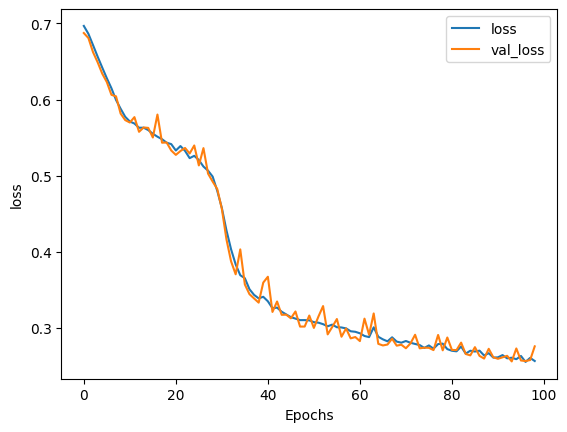

In [18]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.2, ep=100)
plot_history(history_seq, 'loss')

In [19]:
model_seq.save('X4.h5')

In [42]:
# load model
savedModel=load_model('X4.h5')
savedModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 16)        18448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 16)               

694/694 [==============================] - 2s 2ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]
694/694 [==============================] - 2s 2ms/step


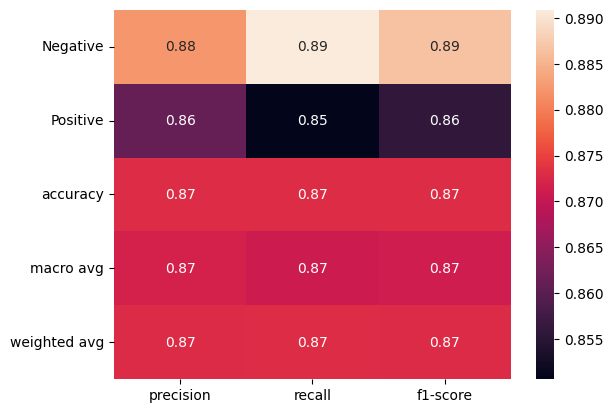

<Figure size 1000x1000 with 0 Axes>

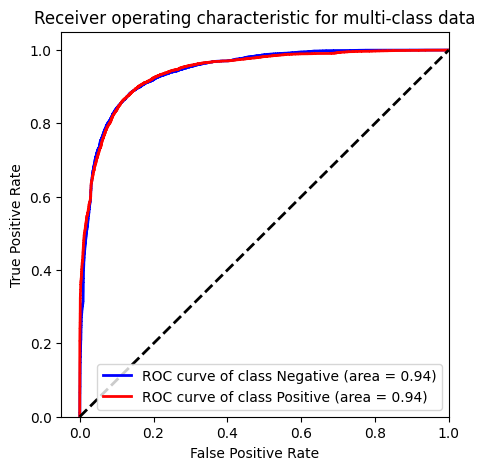

In [43]:
auc_roc(savedModel)

## Model 6

increasing number of convolution layers

In [13]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [14]:
adamax = tf.keras.optimizers.Adamax(learning_rate=0.001,
                                   beta_1=0.9,
                                   beta_2=0.999,
                                   epsilon=1e-07,
                                   name='Adamax')

In [15]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train, lr=0.01, ep=10):
  learning_rate = lr
  epp = ep
  batch_s = 512

  model = keras.Sequential([
    layers.Conv2D(128, (3,3), padding='valid', activation='relu', input_shape=(50,50,3)),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(16, (3,3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])

  # Compile the Model

  model.compile(optimizer=adamax,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train,
                      epochs=epp,
                      validation_split=0.2,
                      batch_size=batch_s,
                      verbose=1,
                      callbacks=[callback]
                      )

  return model,history

Epoch 1/100
139/139 [==============================] - 27s 91ms/step - loss: 0.6879 - accuracy: 0.5474 - val_loss: 0.6765 - val_accuracy: 0.5730
Epoch 2/100
139/139 [==============================] - 10s 75ms/step - loss: 0.6671 - accuracy: 0.5911 - val_loss: 0.6553 - val_accuracy: 0.6076
Epoch 3/100
139/139 [==============================] - 11s 79ms/step - loss: 0.6427 - accuracy: 0.6217 - val_loss: 0.6340 - val_accuracy: 0.6342
Epoch 4/100
139/139 [==============================] - 11s 79ms/step - loss: 0.6269 - accuracy: 0.6375 - val_loss: 0.6204 - val_accuracy: 0.6452
Epoch 5/100
139/139 [==============================] - 11s 79ms/step - loss: 0.6151 - accuracy: 0.6447 - val_loss: 0.6108 - val_accuracy: 0.6444
Epoch 6/100
139/139 [==============================] - 11s 78ms/step - loss: 0.6038 - accuracy: 0.6536 - val_loss: 0.6013 - val_accuracy: 0.6553
Epoch 7/100
139/139 [==============================] - 10s 75ms/step - loss: 0.5966 - accuracy: 0.6596 - val_loss: 0.5953 - val_ac

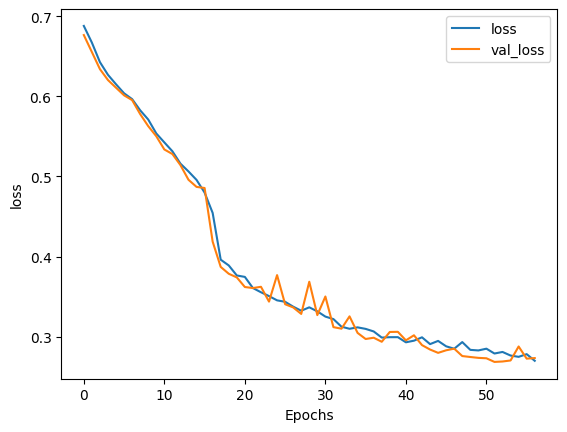

In [16]:
model_seq,history_seq = build_model_using_sequential(images, y, lr=0.1, ep=100)
plot_history(history_seq, 'loss')

In [18]:
accuracy(model_seq)[0]

694/694 [==============================] - 2s 3ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]


0.8827716705712741

694/694 [==============================] - 4s 6ms/step
       Actual  Pred
0         1.0     1
1         1.0     1
2         0.0     0
3         0.0     0
4         1.0     1
...       ...   ...
22191     0.0     0
22192     1.0     1
22193     0.0     0
22194     0.0     0
22195     0.0     0

[22196 rows x 2 columns]
694/694 [==============================] - 2s 2ms/step


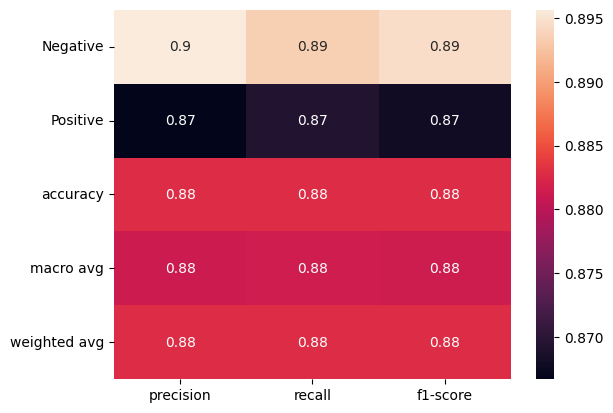

<Figure size 1000x1000 with 0 Axes>

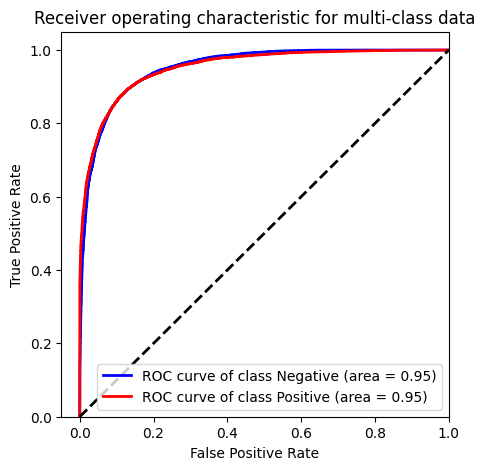

In [20]:
auc_roc(model_seq)